#### flower species prediction

In [1]:
# pre-requisites
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./iris.csv')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##### exploratory data analysis

In [4]:
# get the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# check if dataset has any NA value
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### data cleansing

In [6]:
from sklearn.preprocessing import LabelEncoder

# create encoder
encoder = LabelEncoder()

# convert the species column from textual to numeric data type
encoder.fit(df['species'])
df['species'] = encoder.transform(df['species'])

In [7]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
# check the species column values
df['species'].value_counts()


species
0    50
1    50
2    50
Name: count, dtype: int64

In [9]:
# correlation analysis
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


#### split data

In [10]:
# create x
x = df.drop(['species', 'sepal_width'], axis=1)

# create y 
y = df['species']

In [11]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8, random_state=123456
)

#### model building

In [12]:
from sklearn.linear_model import LogisticRegressionCV

def create_logistic_regression_model():
    # create the model
    model = LogisticRegressionCV()

    # train the model
    model.fit(x_train, y_train)

    return model

In [13]:
from sklearn.svm import SVC

def create_svm_model():
    # create the model
    model = SVC()

    # train the model
    model.fit(x_train, y_train)

    return model

In [14]:
from sklearn.neighbors import KNeighborsClassifier

def create_knn_model():
    # create the model
    model = KNeighborsClassifier(n_neighbors=5)

    # train the model
    model.fit(x_train, y_train)

    return model

In [15]:
from sklearn.naive_bayes import GaussianNB

def create_naive_bayes_model():
    # create the model
    model = GaussianNB()

    # train the model
    model.fit(x_train, y_train)

    return model

In [16]:
from sklearn.tree import DecisionTreeClassifier

def create_decision_tree_model():
    # create the model
    model = DecisionTreeClassifier(max_depth=10)

    # train the model
    model.fit(x_train, y_train)

    return model

In [17]:
from sklearn.ensemble import RandomForestClassifier

def create_random_forest_model():
    # create the model
    model = RandomForestClassifier(n_estimators=100, max_depth=10)

    # train the model
    model.fit(x_train, y_train)

    return model

In [18]:
from xgboost import XGBClassifier

def create_xgb_model():
    # create the model
    model = XGBClassifier(n_estimators=35, max_depth=2, learning_rate=0.2)

    # train the model
    model.fit(x_train, y_train)

    return model

In [19]:
from sklearn.ensemble import AdaBoostClassifier

def create_adaboost_model():
    # create the model
    model = AdaBoostClassifier(n_estimators=35, learning_rate=0.2)

    # train the model
    model.fit(x_train, y_train)

    return model

In [20]:
from catboost import CatBoostClassifier

def create_catboost_model():
    # create the model
    model = CatBoostClassifier(learning_rate=0.2)

    # train the model
    model.fit(x_train, y_train)

    return model

#### model evaluation

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model_on_test_data(model):
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    return f"{accuracy:.2f}", f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}"

In [56]:
# create the models
models = []
models.append({"name": "Logistic Regression", "model": create_logistic_regression_model()})
models.append({"name": "KNN", "model": create_knn_model()})
models.append({"name": "SVM", "model": create_svm_model()})
models.append({"name": "Naive Bayes", "model": create_naive_bayes_model()})
models.append({"name": "Decision Tree", "model": create_decision_tree_model()})
models.append({"name": "Random Forest", "model": create_random_forest_model()})
models.append({"name": "XGBoost", "model": create_xgb_model()})
models.append({"name": "AdaBoost", "model": create_adaboost_model()})
models.append({"name": "CatBoost", "model": create_catboost_model()})

0:	learn: 0.8697776	total: 2.09ms	remaining: 2.09s
1:	learn: 0.7148732	total: 4.2ms	remaining: 2.1s
2:	learn: 0.6052008	total: 5.61ms	remaining: 1.86s
3:	learn: 0.5129576	total: 6.23ms	remaining: 1.55s
4:	learn: 0.4447498	total: 7.29ms	remaining: 1.45s
5:	learn: 0.3893008	total: 8.3ms	remaining: 1.38s
6:	learn: 0.3410931	total: 9.45ms	remaining: 1.34s
7:	learn: 0.3073780	total: 10.2ms	remaining: 1.26s
8:	learn: 0.2828868	total: 10.9ms	remaining: 1.2s
9:	learn: 0.2550439	total: 11.9ms	remaining: 1.17s
10:	learn: 0.2386822	total: 12.9ms	remaining: 1.16s
11:	learn: 0.2204945	total: 14.3ms	remaining: 1.18s
12:	learn: 0.2048596	total: 15.5ms	remaining: 1.18s
13:	learn: 0.1931169	total: 17.1ms	remaining: 1.21s
14:	learn: 0.1759449	total: 18.5ms	remaining: 1.21s
15:	learn: 0.1657388	total: 19.2ms	remaining: 1.18s
16:	learn: 0.1559743	total: 19.9ms	remaining: 1.15s
17:	learn: 0.1489292	total: 21.1ms	remaining: 1.15s
18:	learn: 0.1411216	total: 22.3ms	remaining: 1.15s
19:	learn: 0.1330826	total

In [58]:
# evaluate all the models
for info in models:
    accuracy, precision, recall, f1 = evaluate_model_on_test_data(info["model"])
    info["accuracy"] = accuracy
    info["precision"] = precision
    info["recall"] = recall
    info["f1"] = f1

# print the evaluation report
df_evaluation_report_test = pd.DataFrame(models, columns=["name", "accuracy", "precision", "recall", "f1"])
df_evaluation_report_test

,name,accuracy,precision,recall,f1
0,Logistic Regression,1.00,1.00,1.00,1.00
1,KNN,1.00,1.00,1.00,1.00
2,SVM,1.00,1.00,1.00,1.00
3,Naive Bayes,1.00,1.00,1.00,1.00
4,Decision Tree,0.93,0.94,0.94,0.94
5,Random Forest,0.97,0.97,0.97,0.97
6,XGBoost,1.00,1.00,1.00,1.00
7,AdaBoost,0.97,0.97,0.97,0.97
8,CatBoost,0.97,0.97,0.97,0.97


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model_on_train_data(model):
    y_pred = model.predict(x_train)

    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average="macro")
    recall = recall_score(y_train, y_pred, average="macro")
    f1 = f1_score(y_train, y_pred, average="macro")
    return f"{accuracy:.2f}", f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}"

In [43]:
# evaluate all the models
for info in models:
    accuracy, precision, recall, f1 = evaluate_model_on_train_data(info["model"])
    info["accuracy"] = accuracy
    info["precision"] = precision
    info["recall"] = recall
    info["f1"] = f1

# print the evaluation report
df_evaluation_report_train = pd.DataFrame(models, columns=["name", "accuracy", "precision", "recall", "f1"])
df_evaluation_report_train

,name,accuracy,precision,recall,f1
0,Logistic Regression,0.98,0.98,0.98,0.98
1,KNN,0.97,0.97,0.97,0.97
2,SVM,0.96,0.96,0.96,0.96
3,Naive Bayes,0.95,0.95,0.95,0.95
4,Decision Tree,1.00,1.00,1.00,1.00
5,Random Forest,1.00,1.00,1.00,1.00
6,XGBoost,0.98,0.98,0.98,0.98
7,AdaBoost,0.94,0.95,0.94,0.94
8,CatBoost,1.00,1.00,1.00,1.00


#### output visualization

In [60]:
def visualize_model(info):
    
    y_pred = info["model"].predict(x_test)
    plt.scatter(x_test['petal_length'][y_pred == 0], x_test['petal_width'][y_pred == 0], color="green", label="setosa")
    plt.scatter(x_test['petal_length'][y_pred == 1], x_test['petal_width'][y_pred == 1], color="red", label="virsicolor")
    plt.scatter(x_test['petal_length'][y_pred == 2], x_test['petal_width'][y_pred == 2], color="orange", label="virginica")
    plt.xlabel("petal_length")
    plt.ylabel("petal_width")
    plt.title(f"{info['name']} Visualization ")
    plt.legend()

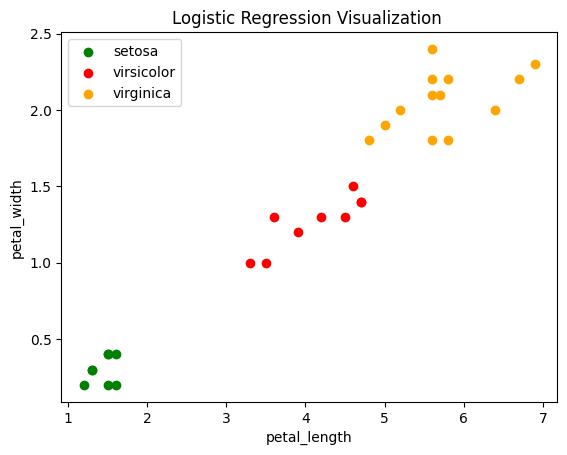

In [61]:
visualize_model(models[0])

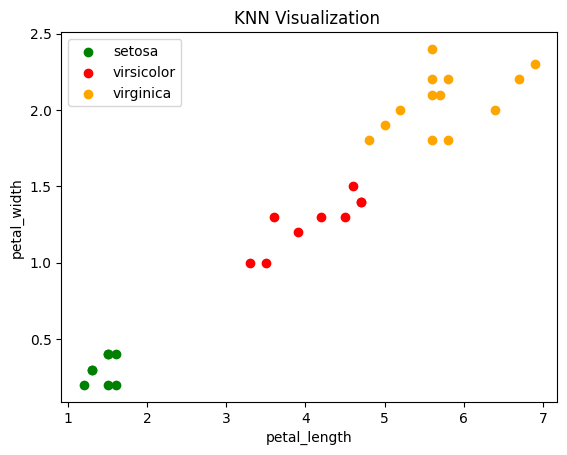

In [62]:
visualize_model(models[1])

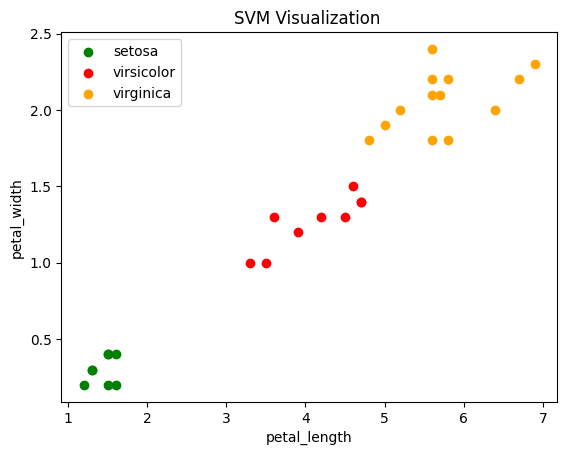

In [63]:
visualize_model(models[2])

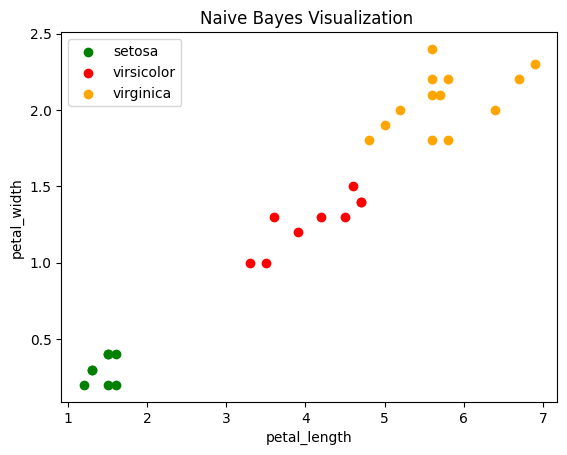

In [64]:
visualize_model(models[3])

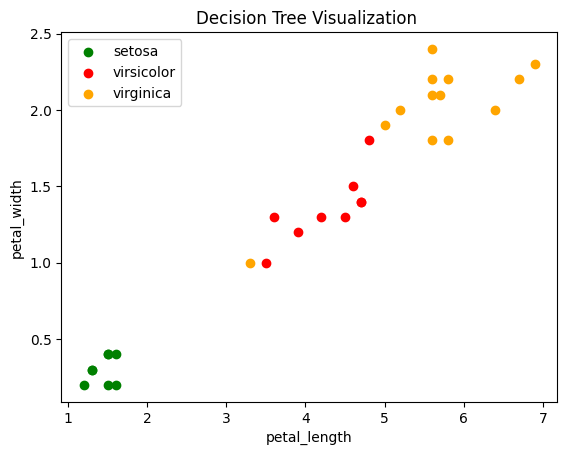

In [65]:
visualize_model(models[4])

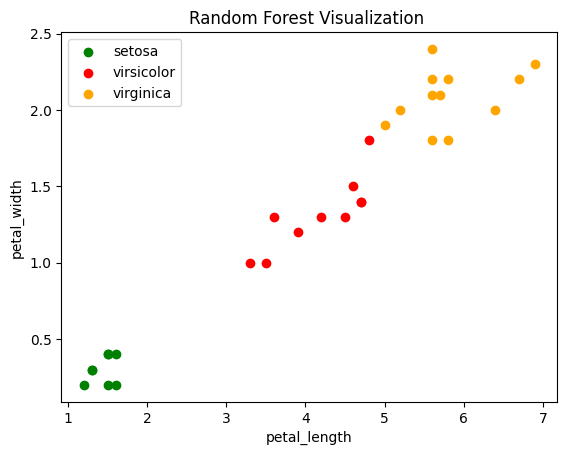

In [66]:
visualize_model(models[5])

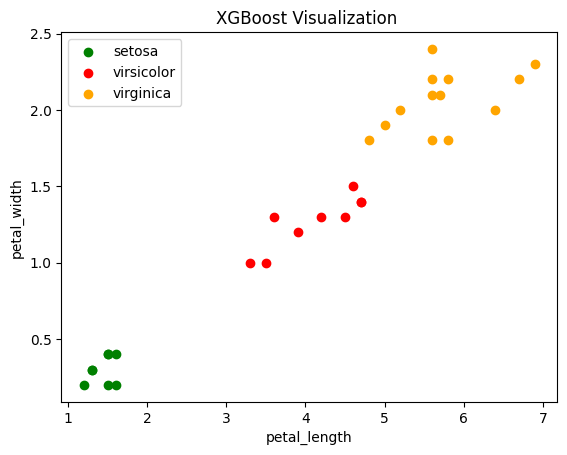

In [67]:
visualize_model(models[6])

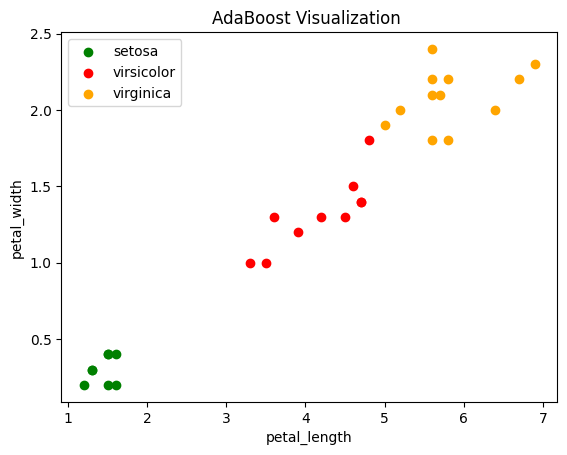

In [68]:
visualize_model(models[7])